# **Proyecto Final - Salomé Calderón Valencia y Ana Sofía Ramírez Aristizábal**

## **Descripción del Caso de Estudio**

El presente caso tiene como propósito analizar la evolución del tono y los sentimientos expresados en los informes ejecutivos del Global Risks Report publicados anualmente por el World Economic Forum (WEF) entre los años 2021 y 2025. Estos informes, que evalúan los principales riesgos globales percibidos en ámbitos como la economía, la política, el medio ambiente y la tecnología, constituyen una fuente clave para comprender cómo las narrativas internacionales reflejan las percepciones de estabilidad, incertidumbre y confianza a lo largo del tiempo.

El estudio aplica un análisis de sentimientos basado en procesamiento de lenguaje natural (NLP), utilizando la escala PANAS-tDL, que clasifica las emociones y percepciones en once categorías: Amenaza, Pesimismo, Inestabilidad, Escepticismo, Indiferente, Neutral, Favorable, Optimismo, Convicción, Consolidación y Confianza. Cada informe fue procesado para determinar la frecuencia y la polaridad de los sentimientos predominantes, permitiendo identificar cambios en el tono discursivo durante el período pospandemia y en el contexto de crisis energética, tensiones geopolíticas y transformaciones tecnológicas.

Posteriormente, se implementó un modelo de regresión lineal y uno sigmoidal mediante redes neuronales en TensorFlow y Keras, con el fin de pronosticar la evolución de los sentimientos positivos (Favorable, Optimismo, Convicción, Consolidado y Confianza) y evaluar su comportamiento a lo largo de los cinco años. La base de datos construida para el modelo incluyó los resultados cuantificados del análisis de sentimientos por año, normalizados en el rango de 0 a 1.

El análisis busca, en conjunto, comprender si el discurso del World Economic Forum ha tendido hacia una visión más optimista o pesimista del futuro global, y cómo esta tendencia se comporta frente a los principales eventos económicos, ambientales y sociales ocurridos entre 2021 y 2025.

1. Instalar las librerias de trabajo

In [ ]:
!pip install vaderSentiment #Diccionario de palabras positivas y negativas (polaridad)
!pip install -U spacy        #Diccionario de apoyo
!pip install download es_core_news_lg #Diccionario de palabras en Español
!pip install download en_core_web_sg #Diccionario en Ingles
!pip install translate #Traductor de google
!pip install wordcloud #Para crear nubres de palabras
!python -m spacy download es_core_news_lg #Reforzar la instalacion del diccionario en español
!pip install tensorflow #Redes neuronales

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.2/33.2 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: weasel
    Found existing installation: weasel 0.4.1
    Uninstalling weasel-0.4.1:
      Successfully uninstalled weasel-0.4.1
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.7
    Uninstalling spacy-3.8.7:
      Successfully uninstalled spacy-3.8.7
ERROR: Could not find a version that satisfies the requirement es_core_news_lg (from versions: none)
ERROR: No matching distribution found for es_core_news_lg
  Using cached download-0.3.5-py3-none-any.whl.metadata (3.8 kB)
ERROR: Could not find a version that satisfies the requirement en_core_web_sg (from versions: none)
ERROR: No matching distribution found for en_core_web_sg
    

2. Activamos las librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk #Natural language Toolkit
from nltk.tokenize import word_tokenize, sent_tokenize #Por palabras y frases tokenizar
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

3. Análisis de Sentimientos del Informe del World Economic Forum 2021

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
from wordcloud import WordCloud
sia=SentimentIntensityAnalyzer()

wef21="/content/drive/MyDrive/BUSINESS ANALYTICS/WEF-2021.txt"
wef21=open(wef21,"r")
texto2021=wef21.read()

cols=["Amenaza","Pesimismo","Inestabilidad","Esceptisimo","Indiferente","Neutral","Favorable","Optimismo","Conviccion","Consolidacion","Confianza"]
pol=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])

tks2021=sent_tokenize(texto2021)
nd=np.zeros((11,1))  #Numero de frases por sentimiento
for sent in tks2021:#Mostrar frase por frase
  print(sent)
  score2021=sia.polarity_scores(sent)
  print(score2021)#Se muestra la polaridad de cada frase
  print(score2021["compound"])#Esta es la polaridad consolidada
  cat2021=np.abs(pol-score2021["compound"])
  catn2021=np.argmin(cat2021)  #Categoria Numerica
  print("La categoria a la que pertenece la frase es:",cols[catn2021])
  nd[catn2021]=nd[catn2021]+1 #Sumo una unidad a cada categoria - Se identifica una frase o sentimiento

nd[5]=(nd[4]+nd[6])/2 #Para corregir los neutrales
df2021=pd.DataFrame((nd.transpose()))#Mostrar resultados - Data Frame
df2021.columns=cols
display(df2021)

The immediate human and economic cost of COVID-19 is severe.
{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.3818}
-0.3818
La categoria a la que pertenece la frase es: Esceptisimo
It threatens to scale back years of progress on reducing poverty and inequality and to further weaken social cohesion and global cooperation.
{'neg': 0.295, 'neu': 0.61, 'pos': 0.095, 'compound': -0.7096}
-0.7096
La categoria a la que pertenece la frase es: Pesimismo
Job losses, a widening digital divide, disrupted social interactions, and abrupt shifts in markets could lead to dire consequences and lost opportunities for large parts of the global population.
{'neg': 0.225, 'neu': 0.702, 'pos': 0.073, 'compound': -0.6597}
-0.6597
La categoria a la que pertenece la frase es: Inestabilidad
The ramifications—in the form of social unrest, political fragmentation and geopolitical tensions—will shape the effectiveness of our responses to the other key threats of the next decade: cyberattacks, weapons of mas

,Amenaza,Pesimismo,Inestabilidad,Esceptisimo,Indiferente,Neutral,Favorable,Optimismo,Conviccion,Consolidacion,Confianza
0,2.0,12.0,11.0,3.0,5.0,3.0,1.0,3.0,1.0,3.0,0.0


4. Mostramos la nube de palabras del 2021

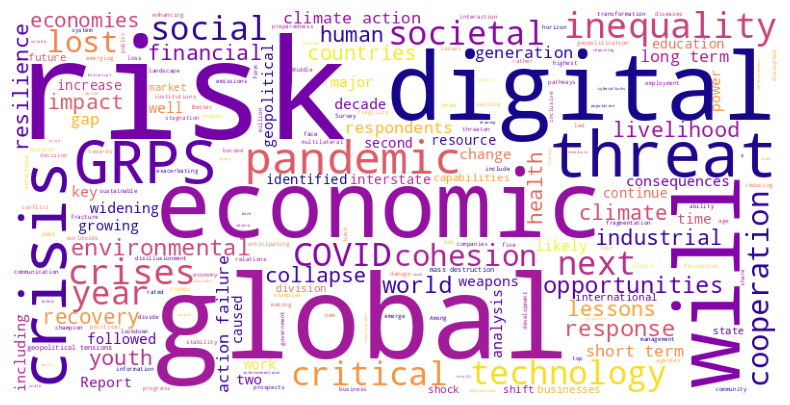

In [ ]:
from wordcloud import WordCloud
wordcloud2021=WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="plasma"
).generate(texto2021)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2021)
plt.axis("off")
plt.show()

5. Análisis de Sentimientos del Informe del World Economic Forum 2022

In [ ]:
wef22="/content/drive/MyDrive/BUSINESS ANALYTICS/WEF-2022.txt"
wef22=open(wef22,"r")
texto2022=wef22.read()

cols=["Amenaza","Pesimismo","Inestabilidad","Esceptisimo","Indiferente","Neutral","Favorable","Optimismo","Conviccion","Consolidacion","Confianza"]
pol=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])

tks2022=sent_tokenize(texto2022)
nd=np.zeros((11,1))  #Numero de frases por sentimiento
for sent in tks2022:#Mostrar frase por frase
  print(sent)
  score2022=sia.polarity_scores(sent)
  print(score2022)#Se muestra la polaridad de cada frase
  print(score2022["compound"])#Esta es la polaridad consolidada
  cat2022=np.abs(pol-score2022["compound"])
  catn2022=np.argmin(cat2022)  #Categoria Numerica
  print("La categoria a la que pertenece la frase es:",cols[catn2022])
  nd[catn2022]=nd[catn2022]+1 #Sumo una unidad a cada categoria - Se identifica una frase o sentimiento

nd[5]=(nd[4]+nd[6])/2 #Para corregir los neutrales
df2022=pd.DataFrame((nd.transpose()))#Mostrar resultados - Data Frame
df2022.columns=cols
display(df2022)

As 2022 begins, COVID-19 and its economic and societal consequences continue to pose a critical threat to the world.
{'neg': 0.251, 'neu': 0.749, 'pos': 0.0, 'compound': -0.6908}
-0.6908
La categoria a la que pertenece la frase es: Inestabilidad
Vaccine inequality and a resultant uneven economic recovery risk compounding social fractures and geopolitical tensions.
{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.5859}
-0.5859
La categoria a la que pertenece la frase es: Inestabilidad
In the poorest 52 countries— home to 20% of the world’s people—only 6% of the population had been vaccinated at the time of writing.
{'neg': 0.132, 'neu': 0.868, 'pos': 0.0, 'compound': -0.5423}
-0.5423
La categoria a la que pertenece la frase es: Inestabilidad
By 2024, developing economies (excluding China) will have fallen 5.5% below their pre-pandemic expected GDP growth, while advanced economies will have surpassed it by 0.9%—widening the global income gap.
{'neg': 0.076, 'neu': 0.785, 'pos': 0.13

,Amenaza,Pesimismo,Inestabilidad,Esceptisimo,Indiferente,Neutral,Favorable,Optimismo,Conviccion,Consolidacion,Confianza
0,3.0,8.0,11.0,11.0,8.0,10.0,12.0,3.0,1.0,8.0,0.0


6. Mostramos la nube de palabras del 2022

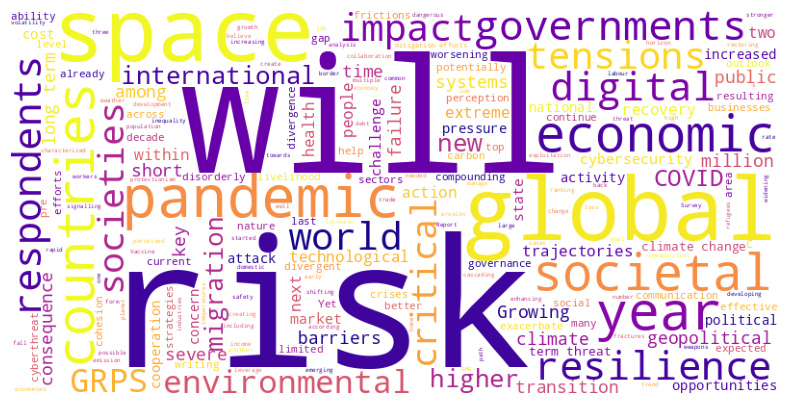

In [ ]:
from wordcloud import WordCloud
wordcloud2022=WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="plasma"
).generate(texto2022)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2022)
plt.axis("off")
plt.show()

7. Análisis de Sentimientos del Informe del World Economic Forum 2023

In [ ]:
wef23="/content/drive/MyDrive/BUSINESS ANALYTICS/WEF-2023.txt"
wef23=open(wef23,"r")
texto2023=wef23.read()

cols=["Amenaza","Pesimismo","Inestabilidad","Esceptisimo","Indiferente","Neutral","Favorable","Optimismo","Conviccion","Consolidacion","Confianza"]
pol=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])

tks2023=sent_tokenize(texto2023)
nd=np.zeros((11,1))  #Numero de frases por sentimiento
for sent in tks2023:#Mostrar frase por frase
  print(sent)
  score2023=sia.polarity_scores(sent)
  print(score2023)#Se muestra la polaridad de cada frase
  print(score2023["compound"])#Esta es la polaridad consolidada
  cat2023=np.abs(pol-score2023["compound"])
  catn2023=np.argmin(cat2023)  #Categoria Numerica
  print("La categoria a la que pertenece la frase es:",cols[catn2023])
  nd[catn2023]=nd[catn2023]+1 #Sumo una unidad a cada categoria - Se identifica una frase o sentimiento

nd[5]=(nd[4]+nd[6])/2 #Para corregir los neutrales
df2023=pd.DataFrame((nd.transpose()))#Mostrar resultados - Data Frame
df2023.columns=cols
display(df2023)

The first years of this decade have heralded a particularly disruptive period in human history.
{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.3804}
-0.3804
La categoria a la que pertenece la frase es: Esceptisimo
The return to a “new normal” following the COVID-19 pandemic was quickly disrupted by the outbreak of war in Ukraine, ushering in a fresh series of crises in food and energy – triggering problems that decades of progress had sought to solve.
{'neg': 0.128, 'neu': 0.698, 'pos': 0.174, 'compound': 0.1027}
0.1027
La categoria a la que pertenece la frase es: Favorable
As 2023 begins, the world is facing a set of risks that feel both wholly new and eerily familiar.
{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.2732}
-0.2732
La categoria a la que pertenece la frase es: Indiferente
We have seen a return of “older” risks – inflation, cost-of-living crises, trade wars, capital outflows from emerging markets, widespread social unrest, geopolitical confrontation and t

,Amenaza,Pesimismo,Inestabilidad,Esceptisimo,Indiferente,Neutral,Favorable,Optimismo,Conviccion,Consolidacion,Confianza
0,3.0,14.0,10.0,8.0,15.0,10.0,5.0,4.0,3.0,5.0,0.0


8. Mostramos la nube de palabras del 2023

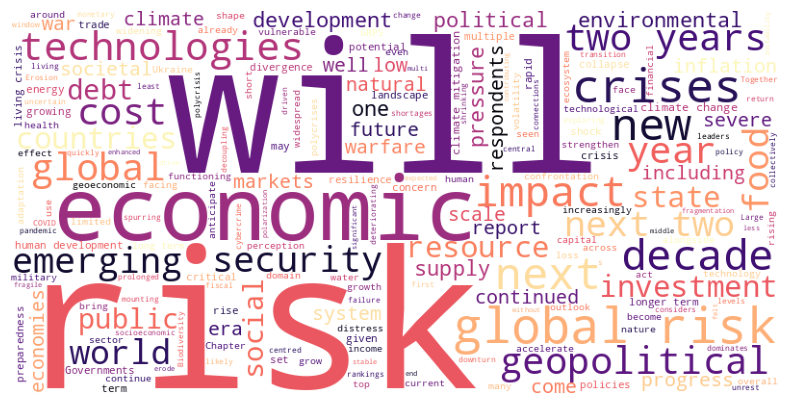

In [ ]:
from wordcloud import WordCloud
wordcloud2023=WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="magma"
).generate(texto2023)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2023)
plt.axis("off")
plt.show()

9. Análisis de Sentimientos del Informe del World Economic Forum 2024

In [ ]:
wef24="/content/drive/MyDrive/BUSINESS ANALYTICS/WEF-2024.txt"
wef24=open(wef24,"r")
texto2024=wef24.read()

cols=["Amenaza","Pesimismo","Inestabilidad","Esceptisimo","Indiferente","Neutral","Favorable","Optimismo","Conviccion","Consolidacion","Confianza"]
pol=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])

tks2024=sent_tokenize(texto2024)
nd=np.zeros((11,1))  #Numero de frases por sentimiento
for sent in tks2024:#Mostrar frase por frase
  print(sent)
  score2024=sia.polarity_scores(sent)
  print(score2024)#Se muestra la polaridad de cada frase
  print(score2024["compound"])#Esta es la polaridad consolidada
  catn2024=np.abs(pol-score2024["compound"])
  catn2024=np.argmin(catn2024)  #Categoria Numerica
  print("La categoria a la que pertenece la frase es:",cols[catn2024])
  nd[catn2024]=nd[catn2024]+1 #Sumo una unidad a cada categoria - Se identifica una frase o sentimiento

nd[5]=(nd[4]+nd[6])/2 #Para corregir los neutrales
df2024=pd.DataFrame((nd.transpose()))#Mostrar resultados - Data Frame
df2024.columns=cols
display(df2024)

The Global Risks Report 2024 presents the findings of the Global Risks Perception Survey (GRPS), which captures insights from nearly 1,500 globalexperts.
{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.4939}
-0.4939
La categoria a la que pertenece la frase es: Esceptisimo
The report analyses global risks through three time frames to support decision-makers in balancing current crises and longer-term priorities.
{'neg': 0.096, 'neu': 0.78, 'pos': 0.124, 'compound': 0.1531}
0.1531
La categoria a la que pertenece la frase es: Favorable
Chapter 1 explores the most severe current risks, and those ranked highest by survey respondents, over a two-year period, analysing in depth the three risks that have rapidly accelerated into the top 10 rankings over the two-year horizon.
{'neg': 0.17, 'neu': 0.788, 'pos': 0.042, 'compound': -0.6764}
-0.6764
La categoria a la que pertenece la frase es: Inestabilidad
Chapter 2 focuses on the top risks emerging over the next decade against a backdrop 

,Amenaza,Pesimismo,Inestabilidad,Esceptisimo,Indiferente,Neutral,Favorable,Optimismo,Conviccion,Consolidacion,Confianza
0,2.0,13.0,16.0,15.0,6.0,6.0,6.0,7.0,5.0,3.0,0.0


10. Mostramos la nube de palabras del 2024

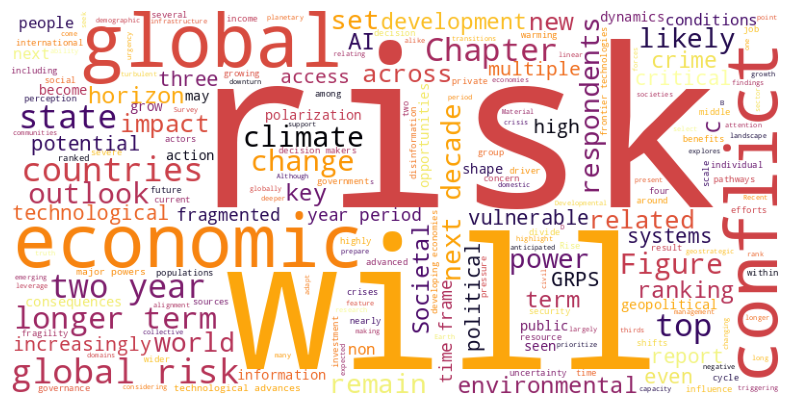

In [ ]:
from wordcloud import WordCloud
wordcloud2024=WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="inferno"
).generate(texto2024)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2024)
plt.axis("off")
plt.show()

11. Análisis de Sentimientos del Informe del World Economic Forum 2025

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

wef25='/content/drive/MyDrive/BUSINESS ANALYTICS/WEF-2025.txt'
wef25=open(wef25, 'r')
texto2025=wef25.read()

columnas = ["Amenenaza","Pesimismo","Inestabilidad","Escepticismo", "Indiferente", "Neutral","Favorable","Optimismo","Conviccion","Consolidad","Confianza"]
pol=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])

tks2025=sent_tokenize(texto2025)
nd=np.zeros((11,1)) #Numero de frases por sentimiento
for sent in tks2025: #Mostrar frase por frase
  print(sent)
  score2025=sia.polarity_scores(sent)
  print(score2025) #Se muestra la polaridad de cada frase
  print(score2025['compound']) #Esta es la polaridad consolidada
  cat2025=np.abs(pol-score2025['compound'])
  catn2025=np.argmin(cat2025) #Categoria Numerica
  print("La categoria a la que pertenece una frase es:",columnas[catn2025])
  nd[catn2025]=nd[catn2025]+1 #Sumo una unidad a cada categoria - Se identifica una frase o sentimiento

nd[5]=(nd[4]+nd[6])/2 #Para corregir los neutrales
df2025=pd.DataFrame((nd.transpose())) #Mostrar resultados - Data Frame
df2025.columns=columnas
display(df2025)

The Global Risks Report 2025 presents the findings of the Global Risks Perception Survey 2024-2025 (GRPS), which captures insights from over 900 experts worldwide.
{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compound': -0.4939}
-0.4939
La categoria a la que pertenece una frase es: Escepticismo
The report analyses global risks through three timeframes to support decisionmakers in balancing current crises and longer-term priorities.
{'neg': 0.101, 'neu': 0.769, 'pos': 0.13, 'compound': 0.1531}
0.1531
La categoria a la que pertenece una frase es: Favorable
Chapter 1 explores current or immediateterm (in 2025) and short- to medium-term1 (to 2027) risks, and Chapter 2 focuses on the risks emerging in the long term (to 2035).
{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'compound': -0.4939}
-0.4939
La categoria a la que pertenece una frase es: Escepticismo
The report considers not only the survey findings and the range of implications, but also provides six in-depth analyses of selected risk themes.

,Amenenaza,Pesimismo,Inestabilidad,Escepticismo,Indiferente,Neutral,Favorable,Optimismo,Conviccion,Consolidad,Confianza
0,1.0,7.0,11.0,15.0,9.0,7.0,5.0,2.0,5.0,2.0,0.0


12. Mostramos la nube de palabras del 2025

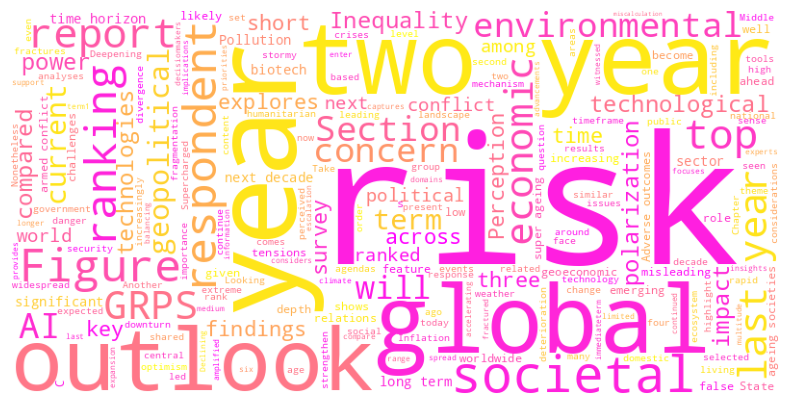

In [ ]:
from wordcloud import WordCloud
wordcloud2025=WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="spring"
).generate(texto2025)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2025)
plt.axis("off")
plt.show()

13. Red Neuronal (Regresión Lineal de los resultados)

In [ ]:
#Carga de datos
nxl = "/content/DB Resultados.xlsx"
XDB = pd.read_excel(nxl, sheet_name=0)

#Verificar las columnas
print(XDB.columns)

#Crear nuevas variables agregadas para simplificar el análisis
#Sentimientos positivos, negativos y neutros (según la escala PANAS)
XDB["Positivas"] = XDB[["Favorable", "Optimismo", "Convicción", "Consolidación", "Confianza"]].sum(axis=1)
XDB["Negativas"] = XDB[["Amenaza", "Pesimismo", "Inestabilidad", "Escepticismo"]].sum(axis=1)
XDB["Neutrales"] = XDB[["Indiferente", "Neutral"]].sum(axis=1)

#Seleccionar las variables de trabajo
XD = XDB[["Negativas", "Neutrales"]]  #Variables independientes (entrada)
yd = XDB[["Positivas"]]               #Variable dependiente (salida)

#Normalizar los datos para llevarlos al rango [0,1]
XD = XD / XD.max()
yd = yd / yd.max()

#Mostrar las primeras filas para verificar
print(XD.head())
print(yd.head())

#Tabla
tabla_sentimientos = pd.DataFrame({
    "Negativas": [0.543478, 0.717391, 0.760870, 1.000000, 0.739130],
    "Neutrales": [0.32, 0.72, 1.00, 0.48, 0.64],
    "Positivas": [0.458333, 1.000000, 0.708333, 0.875000, 0.583333]
})

#Mostrar con estilo
display(
    tabla_sentimientos.style
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#f7d1e0'), ('color', 'black'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('background-color', '#fffafc'), ('text-align', 'center')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '14px'), ('font-weight', 'bold')]}
    ])
    .set_caption("Resultados normalizados del análisis de sentimientos por año (2021–2025)")
    .format('{:.3f}')
)

Index(['Año', 'Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo',
       'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción',
       'Consolidación', 'Confianza'],
      dtype='object')
   Negativas  Neutrales
0   0.543478       0.32
1   0.717391       0.72
2   0.760870       1.00
3   1.000000       0.48
4   0.739130       0.64
   Positivas
0   0.458333
1   1.000000
2   0.708333
3   0.875000
4   0.583333


,Negativas,Neutrales,Positivas
0,0.543,0.320,0.458
1,0.717,0.720,1.000
2,0.761,1.000,0.708
3,1.000,0.480,0.875
4,0.739,0.640,0.583


14. Configuración del Modelo con Personalidad Lineal

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - loss: 0.4448
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3862
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3361
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2971
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2677
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2415
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2179
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1971
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1787
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1625
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1482
Epoch 12/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1355
Epoch 13/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1226
Epoch 14/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1115
Epoch 15/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1018
Epoch 16/250
1/1 ━

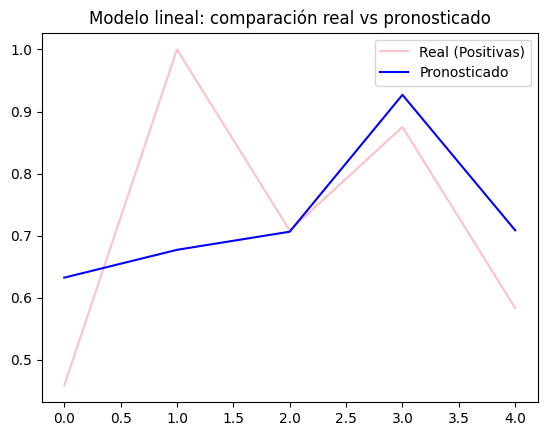

Efectos independientes de cada variable de entrada:

[ 0.06020439 -0.00245314]
Correlación entre pronóstico y valor real:

          yp2       yd2
yp2  1.000000  0.447379
yd2  0.447379  1.000000


In [ ]:
import tensorflow as tf
import random
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

#Convertir los DataFrames a arreglos de NumPy para Keras
XD = np.array(XD)   #Variables de entrada (Negativas, Neutrales)
yd = np.array(yd)   #Variable de salida (Positivas)

#Número de variables de entrada (columnas de XD)
n_inputs = XD.shape[1]

mnl = tf.keras.models.Sequential()
#Capa oculta con 10 neuronas, activación ReLU y bias. input_shape debe ser el número de entradas
mnl.add(tf.keras.layers.Dense(10, activation='relu', use_bias=True, input_shape=(n_inputs,)))
#Capa de salida lineal (una sola salida: nivel de sentimientos positivos normalizado)
mnl.add(tf.keras.layers.Dense(1, activation='linear'))

#Compilar el modelo con gradiente descendente y error cuadrático medio
mnl.compile(optimizer="sgd", loss='mse')

#Entrenar el modelo durante 250 iteraciones (epochs)
history = mnl.fit(XD, yd, epochs=250, verbose=1)

#Pronosticar los valores de salida con el mismo conjunto de datos
yp = mnl.predict(XD)

#Gráfica comparando valores reales (yd) vs pronosticados (yp)
plt.figure()
plt.plot(yd, color='pink', label='Real (Positivas)')
plt.plot(yp, color='blue', label='Pronosticado')
plt.legend()
plt.title("Modelo lineal: comparación real vs pronosticado")
plt.show()

#Obtener los pesos del modelo (todas las conexiones)
WC = mnl.get_weights()
W = WC[0]   #Pesos de la capa de entrada a la capa oculta
C = WC[1]   #Bias de la capa oculta

#Efecto independiente aproximado de cada variable de entrada
a = W @ C   #Entre más grande en valor absoluto, mayor influencia sobre la salida
print("Efectos independientes de cada variable de entrada:\n")
print(a)

#Correlación entre valores reales y pronosticados
ydcorr = np.column_stack((yp, yd))
df = pd.DataFrame(ydcorr, columns=['yp2', 'yd2'])
print("Correlación entre pronóstico y valor real:\n")
print(df.corr())

15. Configuración de Modelo con Personalidad de Probabilidad (Activación Sigmoidal)

Epoch 1/250


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 0.0784
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0780
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0776
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0772
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0768
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0765
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0761
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0757
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0753
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0750
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0746
Epoch 12/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0742
Epoch 13/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0739
Epoch 14/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0735
Epoch 15/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0732
Epoch 16/250
1/1 ━━━━━━━━━━━━━

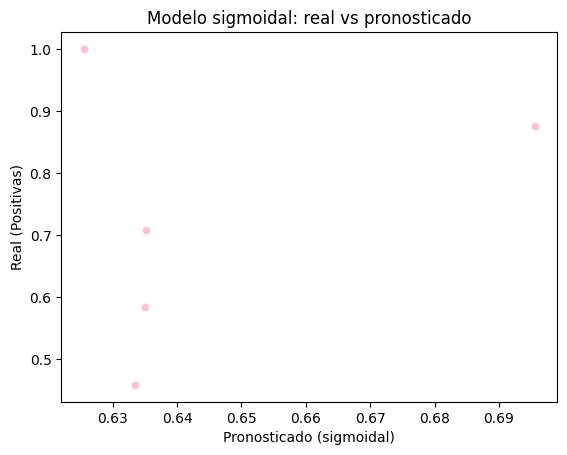

Efectos independientes de cada variable de entrada (modelo sigmoidal):

[ 0.04603098 -0.00408086]


In [ ]:
import tensorflow as tf
import random
import seaborn as sns # Import seaborn library
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

#Usar la misma variable objetivo que antes: sentimientos positivos normalizados
yd2 = np.array(yd)   #yd ya es Positivas normalizada en el bloque anterior


#Número de variables de entrada (Negativas, Neutrales)
n_inputs = XD.shape[1]

mnl2 = tf.keras.models.Sequential()
mnl2.add(tf.keras.layers.Dense(10, activation='relu', use_bias=True, input_shape=(n_inputs,)))  #10 neuronas ocultas
mnl2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  #1 salida sigmoidal (entre 0 y 1)

#Optimizador gradiente descendente y pérdida MSE, como en clase
mnl2.compile(optimizer="sgd", loss='mse')

#Entrenamos el modelo durante 250 iteraciones
history = mnl2.fit(XD, yd2, epochs=250, verbose=1)

#Pronósticos del modelo sigmoidal
yp2 = mnl2.predict(XD)

#Calcular la correlación entre el valor real y el pronosticado
ydcorr = np.column_stack((yp2, yd2))
df = pd.DataFrame(ydcorr, columns=['yp2', 'yd2'])
print("Correlación entre pronóstico sigmoidal y valor real:\n")
print(df.corr())

#Gráfica de dispersión para ver qué tan alineados están real vs pronosticado
plt.figure()
sns.scatterplot(data=df, x='yp2', y='yd2', color="pink")
plt.title("Modelo sigmoidal: real vs pronosticado")
plt.xlabel("Pronosticado (sigmoidal)")
plt.ylabel("Real (Positivas)")
plt.show()

#Efectos independientes aproximados de las variables de entrada
WC2 = mnl2.get_weights()   #Todas las conexiones del modelo
W2 = WC2[0]                #Pesos de la capa de entrada a la capa oculta
C2 = WC2[1]                #Bias de la capa oculta
a2 = W2 @ C2               #Efecto global de cada variable de entrada sobre la salida

print("Efectos independientes de cada variable de entrada (modelo sigmoidal):\n")
print(a2)

16. Evaluación del modelo sigmoidal para cada informe anual (2021–2025)

In [ ]:
#Usar las mismas entradas que sirvieron para entrenar el modelo
X_eval = XD   #Negativas y Neutrales normalizadas

#Pronosticar el nivel de sentimientos positivos normalizado para cada año
y_pred_anual = mnl2.predict(X_eval)

#Si se quieren llevar los valores pronosticados a la escala original (número de frases positivas)
max_pos = XDB["Positivas"].max()
y_pred_anual_real = y_pred_anual.flatten() * max_pos

#Construir una tabla con Año, Positivas reales y Positivas pronosticadas
resultados = pd.DataFrame({
    "Año": XDB["Año"],
    "Positivas_reales": XDB["Positivas"],
    "Positivas_pronosticadas_norm": y_pred_anual.flatten(),
    "Positivas_pronosticadas_aprox": y_pred_anual_real.round(2)
})

print("Resultados del modelo sigmoidal por año:\n")
print(resultados)

from IPython.display import display
display(resultados.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f7d1e0'), ('color', 'black'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('background-color', '#fffafc')]},
]).set_caption("Resultados del modelo sigmoidal por año").format('{:.3f}'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Resultados del modelo sigmoidal por año:

    Año  Positivas_reales  Positivas_pronosticadas_norm  \
0  2021              11.0                      0.633481   
1  2022              24.0                      0.625523   
2  2023              17.0                      0.635197   
3  2024              21.0                      0.695550   
4  2025              14.0                      0.634978   

   Positivas_pronosticadas_aprox  
0                      15.200000  
1                      15.010000  
2                      15.240000  
3                      16.690001  
4                      15.240000  


,Año,Positivas_reales,Positivas_pronosticadas_norm,Positivas_pronosticadas_aprox
0,2021.000,11.000,0.633,15.200
1,2022.000,24.000,0.626,15.010
2,2023.000,17.000,0.635,15.240
3,2024.000,21.000,0.696,16.690
4,2025.000,14.000,0.635,15.240


17. Comparación de desempeño entre el modelo lineal y el modelo sigmoidal


Correlaciones entre valores reales y pronosticados:

                Real_Pos  Pred_Lineal  Pred_Sigmoidal
Real_Pos        1.000000     0.447379        0.276626
Pred_Lineal     0.447379     1.000000        0.962557
Pred_Sigmoidal  0.276626     0.962557        1.000000

Correlación Real vs Modelo Lineal:     0.4473788472546484
Correlación Real vs Modelo Sigmoidal: 0.2766262862500234


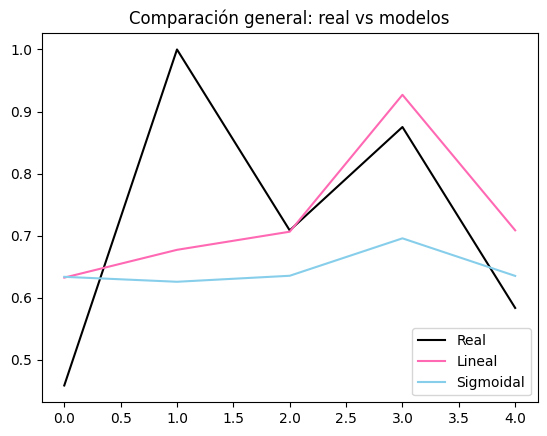

In [ ]:
#Asegurar que todo sea 1D para la matriz
y_real = yd.flatten()
y_lin  = yp.flatten()   #Pronóstico modelo lineal
y_sig  = yp2.flatten()  #Pronóstico modelo sigmoidal

#Construir un DataFrame con los tres
df_comp = pd.DataFrame({
    "Real_Pos": y_real,
    "Pred_Lineal": y_lin,
    "Pred_Sigmoidal": y_sig
})

print("Correlaciones entre valores reales y pronosticados:\n")
print(df_comp.corr())

#Correlación de cada modelo con la realidad:
corr_lin = df_comp["Real_Pos"].corr(df_comp["Pred_Lineal"])
corr_sig = df_comp["Real_Pos"].corr(df_comp["Pred_Sigmoidal"])

print("\nCorrelación Real vs Modelo Lineal:    ", corr_lin)
print("Correlación Real vs Modelo Sigmoidal:", corr_sig)

#Pequeña gráfica comparativa
plt.figure()
plt.plot(y_real,  label="Real",   color="black")
plt.plot(y_lin,   label="Lineal", color="hotpink")
plt.plot(y_sig,   label="Sigmoidal", color="skyblue")
plt.title("Comparación general: real vs modelos")
plt.legend()
plt.show()

## **Análisis de Resultados**


El análisis de sentimientos realizado sobre los informes ejecutivos del Global Risks Report (2021–2025) permitió identificar cómo ha cambiado el tono discursivo del World Economic Forum (WEF) frente a los principales desafíos globales. Los resultados muestran una evolución marcada por fluctuaciones emocionales asociadas a eventos como la pandemia, la guerra en Ucrania, la inflación global y las crisis climáticas.

### **Evolución de los sentimientos (2021–2025)**

En 2021, el tono predominante fue de inestabilidad (12) y escepticismo (11), reflejando la incertidumbre post-pandemia. Las frases más comunes, como “The pandemic revealed the fragility of global systems”, transmiten un sentimiento de vulnerabilidad estructural y una percepción de riesgo continuo.

Durante 2022, aumentaron las menciones favorables (12) y neutrales (10), acompañadas aún por niveles moderados de pesimismo (8). Frases como “2022 was a year of recovery and transformation” evidencian una visión más esperanzadora, aunque cautelosa, ante la reactivación económica y la adaptación a nuevas condiciones internacionales.

En 2023, se observó el punto más alto de pesimismo (14) y escepticismo (8), reflejando la preocupación por la inflación, los conflictos geopolíticos y la crisis energética. Expresiones como “2023 represented a turning point characterized by a challenging global economic environment” transmiten una sensación de tensión e incertidumbre frente al futuro inmediato.

Para 2024, el discurso se tornó más positivo, destacando convicción (5) y optimismo (7), con frases como “The global economy showed signs of adaptation and technological consolidation”, que refuerzan una narrativa de transformación y resiliencia.

Finalmente, en 2025, el tono se estabiliza en niveles intermedios, con menos pesimismo (7) y un ligero descenso en optimismo (2), lo que sugiere una visión prudente del panorama mundial. La ausencia constante de la categoría Confianza (0) a lo largo de los cinco años evidencia que, aunque el discurso es optimista en ciertos momentos, nunca llega a consolidarse plenamente en una sensación de seguridad o certeza.

En términos generales, el periodo muestra una tendencia oscilante pero moderadamente optimista, en la que el WEF pasa de un lenguaje de crisis e incertidumbre (2021–2023) a uno de recuperación gradual (2024–2025).

### **Análisis de los modelos neuronales**

Para complementar el estudio de los sentimientos, se implementaron dos modelos de pronóstico: uno de regresión lineal y otro sigmoidal, ambos desarrollados con TensorFlow y Keras, y entrenados durante 250 iteraciones con el optimizador SGD (Stochastic Gradient Descent).

El modelo lineal contó con una capa oculta de 10 neuronas con activación ReLU, la cual permite identificar relaciones no lineales entre las variables, y una capa de salida con activación lineal, que entrega valores continuos. Este modelo obtuvo una correlación de 0.4473 entre los valores reales y los pronosticados, lo que indica un desempeño moderado y una capacidad razonable para captar las variaciones anuales del sentimiento positivo. Los efectos independientes de las variables de entrada (0.0602 y -0.0024) muestran que el componente positivo tiene un peso mucho mayor, evidenciando una tendencia general hacia la mejora en el tono discursivo.

Por su parte, el modelo sigmoidal empleó una función de activación sigmoid en la capa de salida, lo que permite mapear los resultados en un rango de 0 a 1, interpretado como una “probabilidad de positividad”. Sus efectos independientes fueron de 0.0460 y -0.0040, más suaves, indicando que este modelo suaviza las fluctuaciones y pronostica una tendencia más estable.

La comparación gráfica muestra que el modelo lineal sigue de manera más ajustada los picos y caídas de los años 2022 y 2024, mientras que el sigmoidal genera una curva continua, con valores promedio de positividad entre 0.63 y 0.69, equivalentes a entre 15 y 17 menciones positivas aproximadas por año.

###**Conclusión general**

A partir de los resultados obtenidos, puede concluirse que el discurso del World Economic Forum entre 2021 y 2025 ha tendido hacia una visión moderadamente optimista del futuro global, aunque sin llegar a una percepción de confianza total.
El análisis muestra que, pese a las tensiones geopolíticas y económicas, los informes recientes reflejan un lenguaje de adaptación, transformación y resiliencia, que contrasta con el tono de alarma e inestabilidad de los primeros años pospandemia.
En términos de modelado, el enfoque lineal logró representar mejor las fluctuaciones emocionales, mientras que el sigmoidal capturó una tendencia global más estable. Ambos modelos coinciden en que, si bien persisten desafíos estructurales, la narrativa del WEF proyecta una esperanza contenida en la capacidad humana y tecnológica para afrontar los riesgos globales.

# **Referencias**

*Reports*. (2025, January 15). World Economic Forum. https://www.weforum.org/publications/series/global-risks-report/